In [9]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns
sns.set(sns.plotting_context("talk"), palette=sns.color_palette('Blues', n_colors=4), style=sns.axes_style("ticks"))

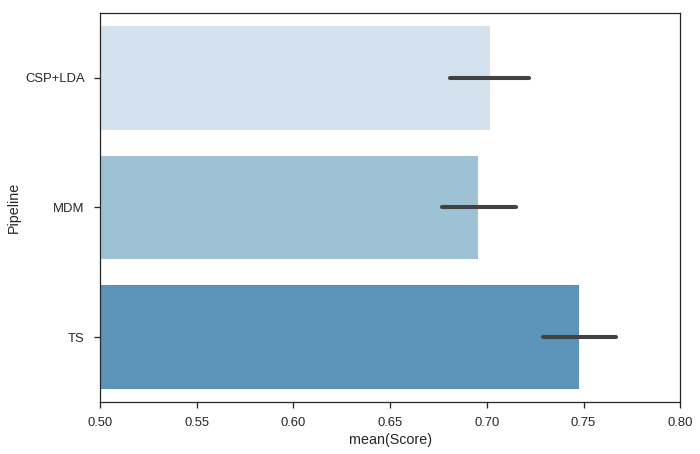

In [10]:
datasets = ['BNCI_2014_001', 'BNCI_2014_002', 'BNCI_2014_004', 'BNCI_2015_001',
            'physionet', 'Alex_mi', 'openvibe_mi', 'gigadb_mi', 'BBCI_EEG_fNIRS']
pipelines = ['CSP+LDA', 'MDM', 'TS']

results = []
for dataset in datasets:
    for pipeline in pipelines:
        r = pd.read_csv('../results/MotorImagery/%s/%s.csv' % (dataset, pipeline), index_col=0)
        results.append(r)
results = pd.concat(results, ignore_index=True)
sns.barplot(y='Pipeline', x='Score', data=results)
plt.xlim(0.5, 0.8);

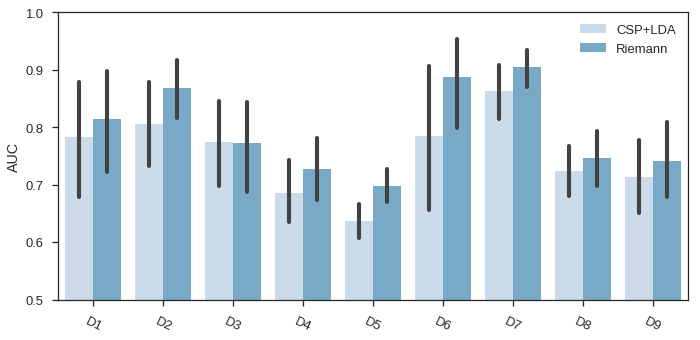

In [11]:
plt.figure(figsize=[10, 5])
datasets = ['BNCI_2014_001', 'BNCI_2014_002', 'BNCI_2014_004', 'BNCI_2015_001',
            'physionet', 'Alex_mi', 'openvibe_mi', 'gigadb_mi', 'BBCI_EEG_fNIRS']
pipelines = ['CSP+LDA','TS']

results = []
for dataset in datasets:
    for pipeline in pipelines:
        r = pd.read_csv('../results/MotorImagery/%s/%s.csv' % (dataset, pipeline), index_col=0)
        results.append(r)
results = pd.concat(results, ignore_index=True)
results.loc[results['Pipeline']=='TS', 'Pipeline'] = 'Riemann'

g = sns.barplot(x='Dataset', y='Score', data=results, hue='Pipeline',
                palette=sns.color_palette('Blues', 3))
g.set_ylim(0.5,1)
g.set_ylabel('AUC')
g.set_xlabel('')
plt.xticks(rotation=-25)
plt.legend(loc='upper right')
g.set_xticklabels(['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9'])

plt.tight_layout()
#plt.savefig('results_MI.pdf', dpi=300)

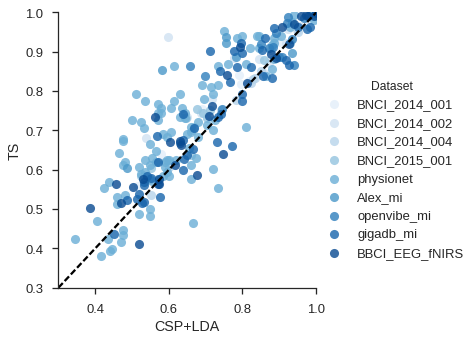

In [12]:
res = []
for dataset in datasets:
    results = []
    for pipeline in pipelines:
        r = pd.read_csv('../results/MotorImagery/%s/%s.csv' % (dataset, pipeline), index_col=0)
        results.append(r)
    results = pd.concat(results, ignore_index=True)
    results = results.pivot(values='Score', columns='Pipeline', index='Subject')
    results['Dataset'] = dataset
    res.append(results)
res = pd.concat(res)
sns.lmplot(data=res, x='CSP+LDA', y='TS', fit_reg=False, hue='Dataset', palette='Blues')
plt.xlim(0.3, 1)
plt.ylim(0.3, 1)
plt.plot([0.3, 1], [0.3, 1], ls='--', c='k')

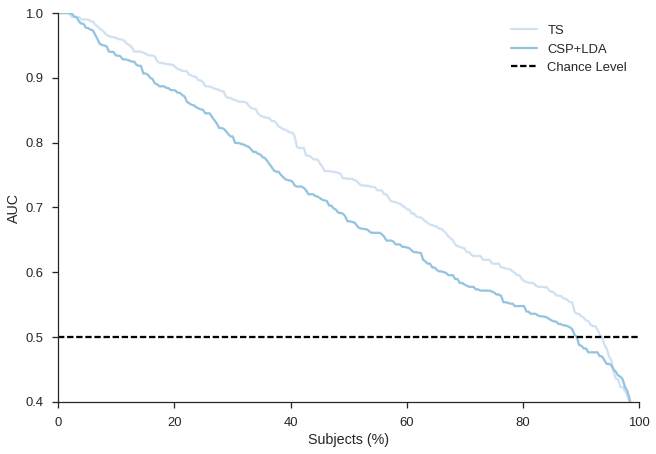

In [16]:
import numpy as np
per = (100. * np.arange(len(res))) / len(res)
plt.plot(per, np.sort(res['TS'].values)[::-1])
plt.plot(per, np.sort(res['CSP+LDA'].values)[::-1])
plt.ylim(0.4, 1.)
plt.plot([0, 100], [0.5, 0.5], ls='--', c='k')
plt.legend(['TS', 'CSP+LDA', 'Chance Level'])
plt.xlim(0, 100)
plt.ylabel('AUC')
plt.xlabel('Subjects (%)');
sns.despine()